<h1 style="font-size: 50px; color:#ff1a1a;text-align: center;
">Students Performance in Exams </h1>

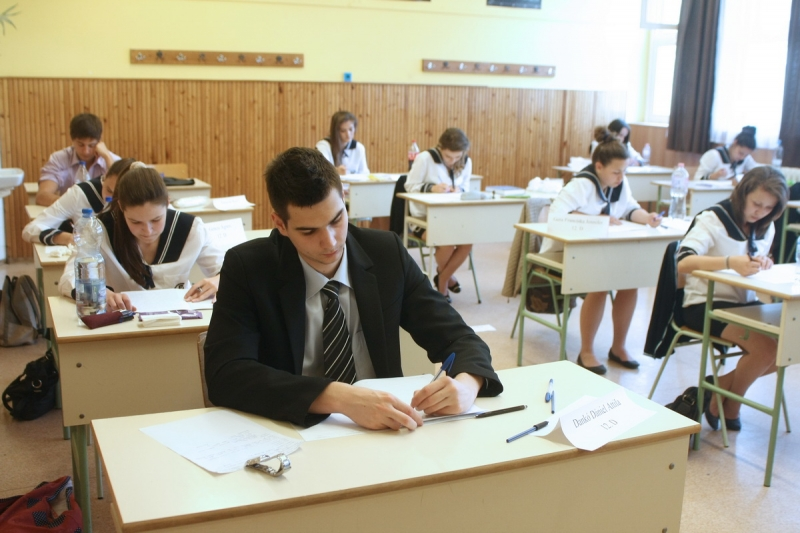

This dataset contains the Marks secured by the students in high school
Students from the United States.This dataset containing columns as gender,race/ethnicity,parental level of education,	lunch,test preparation course,math score,reading score,writing score, of students. from this dataset i want find that which factor is mostly related with  the scores of a student

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import klib as k
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

### Reading data set

In [2]:
df=pd.read_csv('./StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Finding the number of rows and columns in a dataset

In [3]:
df.shape

(1000, 8)

### Finding the datatypes of columns 

In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Finding the statistical measures

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Checking wheather there is any null values

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Rename the Existing columns and minimizing the Name length of the columns

In [7]:
df.rename(columns={'gender':'Gender',
                    'parental level of education':'Parental_Education' , 
                   'test preparation course':'PreparationCourse' 
                   , 'math score':'Math'
                   ,'reading score': 'Reading'
                   , 'writing score': 'Writing'
                  , 'race/ethnicity':'Group'
                  , 'lunch' :'Lunch'} , inplace = True)

<h1 style="font-size: 35px; color:#ff3333;text-align: center;
">EXPLORATORY DATA ANALYSIS </h1>

<h1 style="font-size: 25px; color:#000000;text-align: center;
">BIVARIATE ANALYSIS </h1>

### Finding out which gender have high writing score from the dataset by plotting pie chart

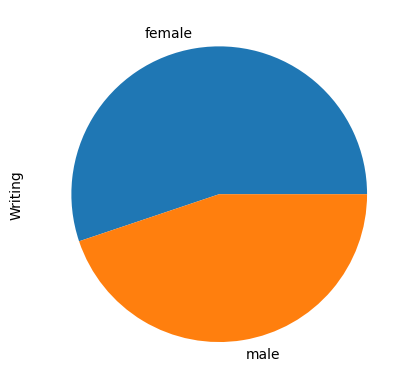

In [8]:
Gender_Writing = df.groupby(['Gender'])['Writing'].sum()
Gender_Writing.plot.pie();

### Finding the count of writing score gender wise using bar plot

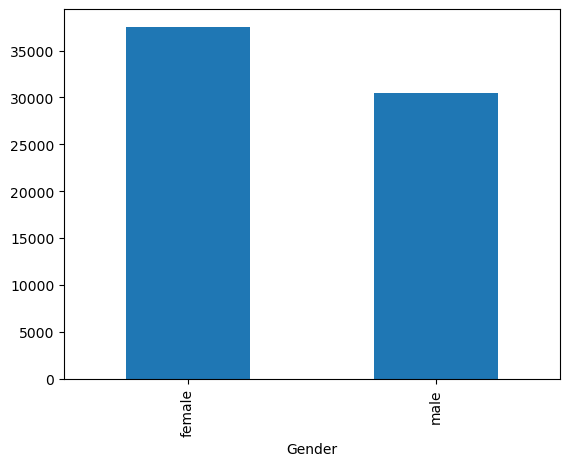

In [9]:
Gender_Writing.plot.bar();

### Finding the Total score of students by adding reading,writing,and maths score and making it as a new column

In [10]:
df['TotalScore'] = df['Math'] + df['Writing'] + df['Reading']
df

,Gender,Group,Parental_Education,Lunch,PreparationCourse,Math,Reading,Writing,TotalScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


### Finding the counts of parental_education

In [12]:
df['Parental_Education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Education, dtype: int64

## Bivariate Analysis

### Analyzing the connection of Parental_Education and TotalScore of student by plotting lineplot

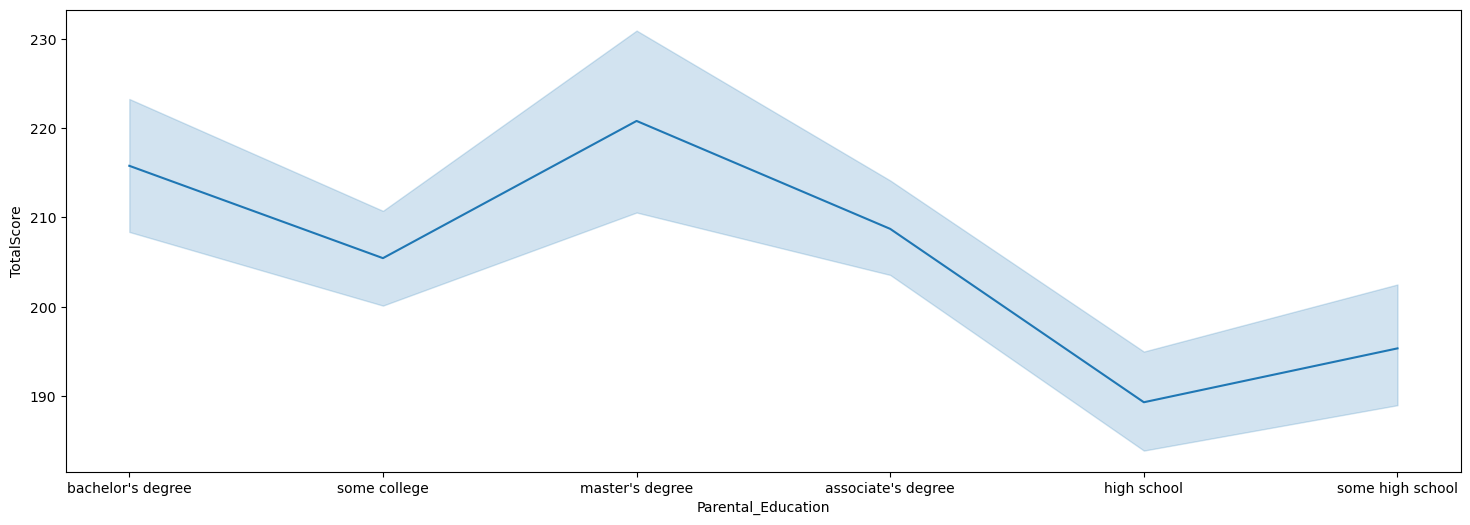

In [13]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Parental_Education', y='TotalScore', data=df)
plt.show()

### Checking wheather  the students who took test preparation course got higher score 

In [14]:
a= df.groupby('PreparationCourse')['TotalScore'].mean().reset_index()
a

,PreparationCourse,TotalScore
0,completed,218.008380
1,none,195.116822


### Gender wise comparison of the students who completed and noncompleted test prepartion course by plotting barchart

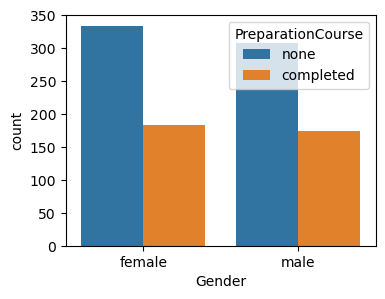

In [15]:
plt.figure(figsize=(4,3))
sns.countplot('Gender',hue='PreparationCourse',data=df)
plt.show()

### comparing total score gender wise in each group with factorplot

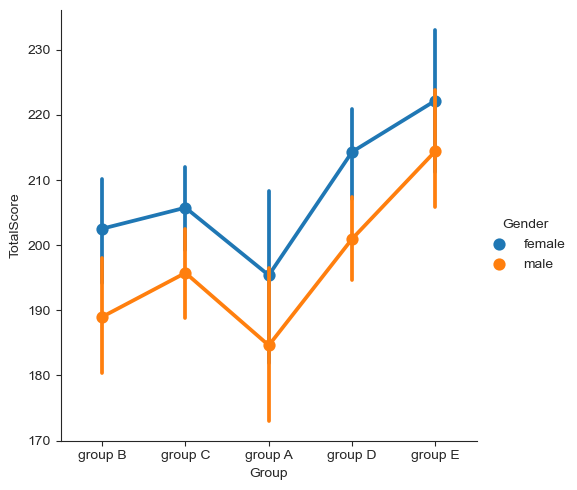

In [16]:
sns.set_style('ticks')
sns.factorplot('Group','TotalScore',hue='Gender',data=df)
plt.show()

### Plotting pair plot with the data set

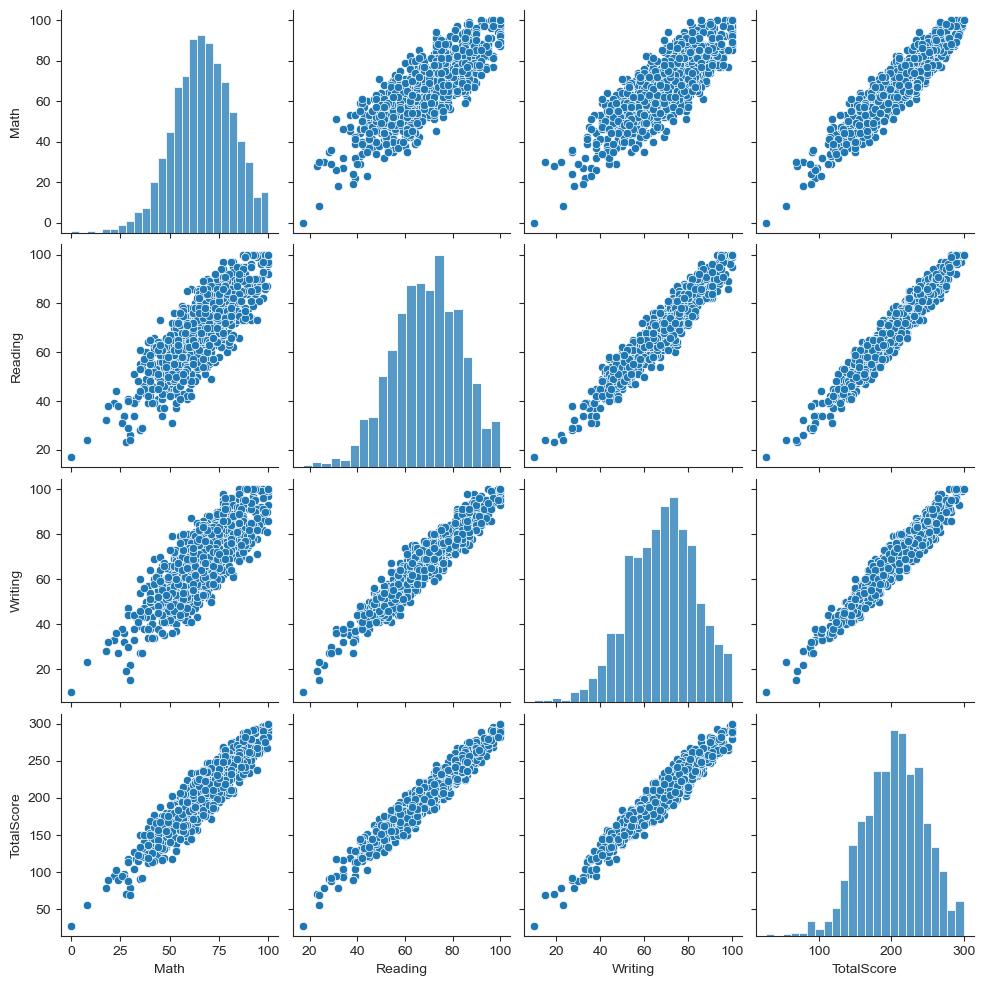

In [17]:
sns.pairplot(data=df)
plt.show()

### finding the  totalscores getted for male and female whoses are completed and non completed PreparationCourse by plotting violine plot

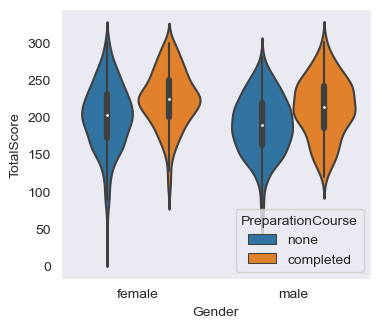

In [18]:
sns.set_style('dark')
plt.figure(figsize=(4,3.5))
sns.violinplot('Gender','TotalScore',hue='PreparationCourse',data=df)
plt.show()

<h1 style="font-size: 25px; color:#000000;text-align: center;
">UNIVARIATE ANALYSIS </h1>

### plotting dist plot with the given data set

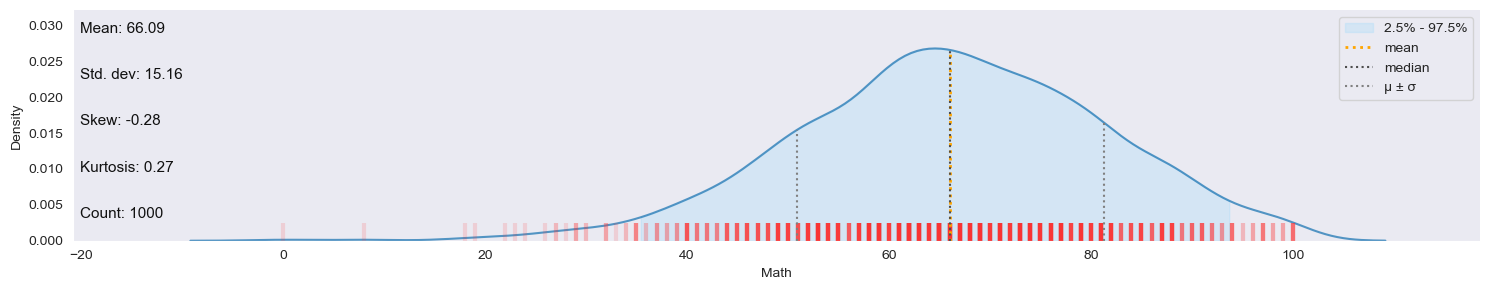

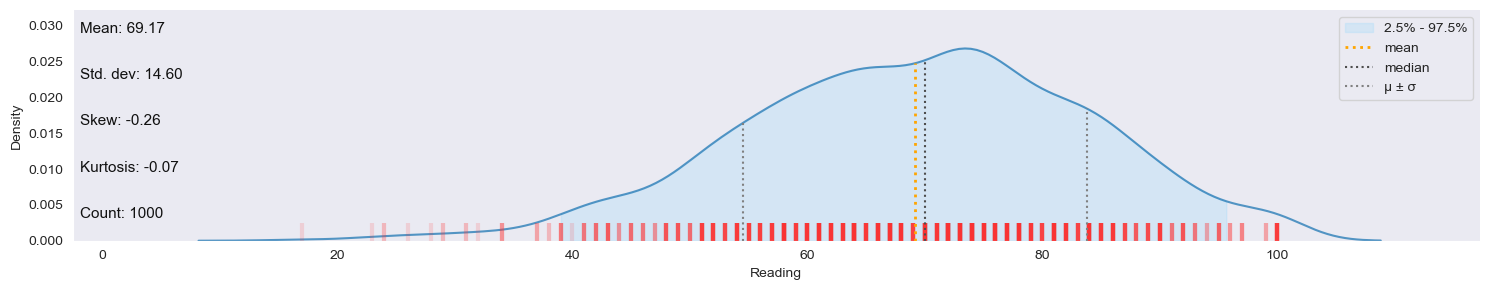

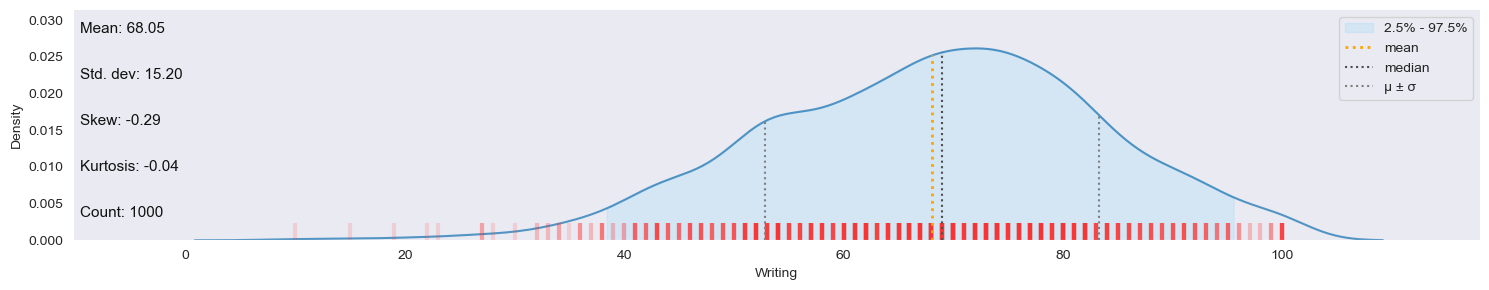

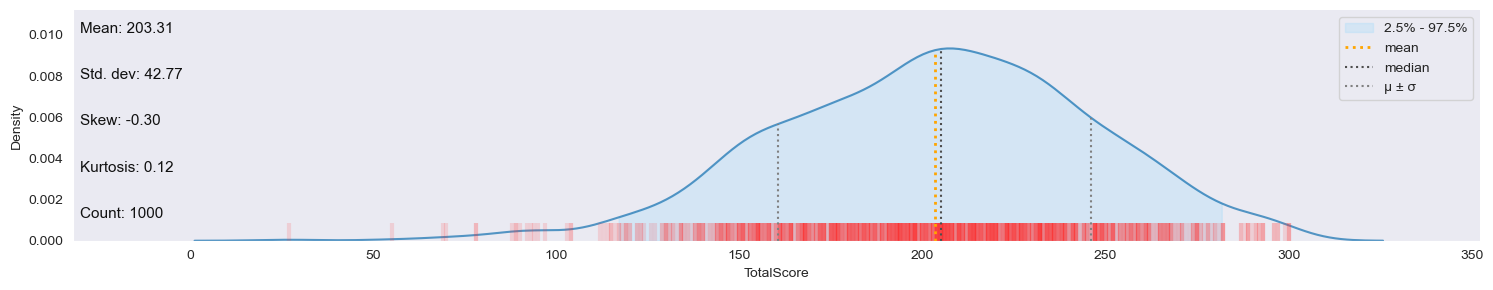

In [19]:
k.dist_plot(data=df);

### Histplot

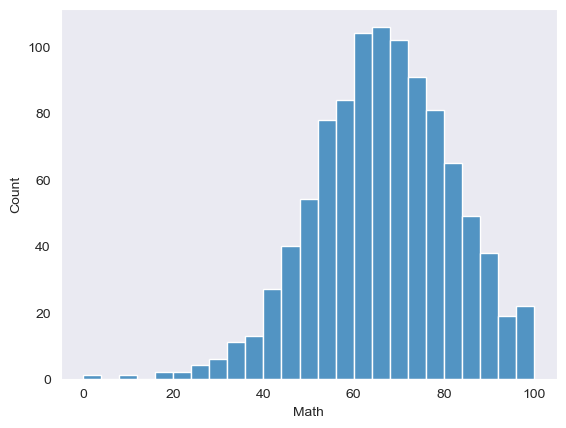

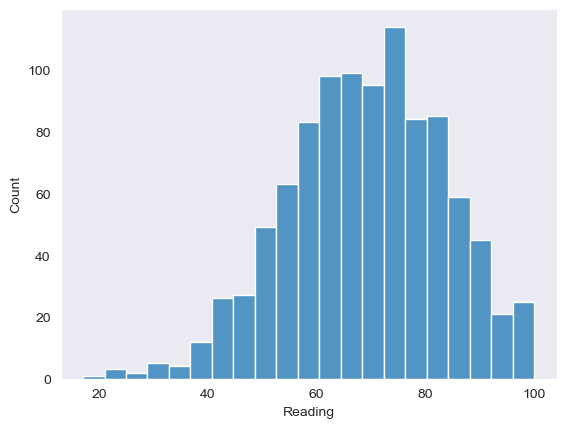

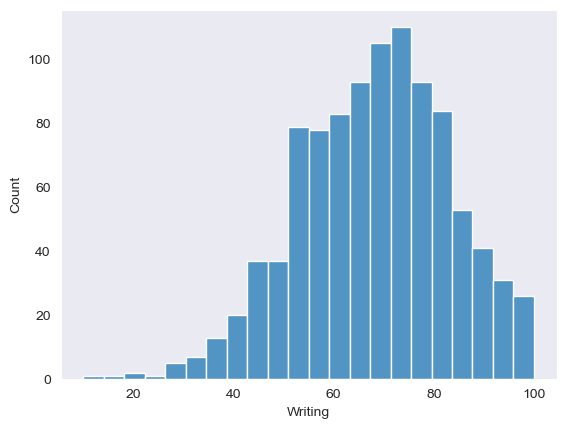

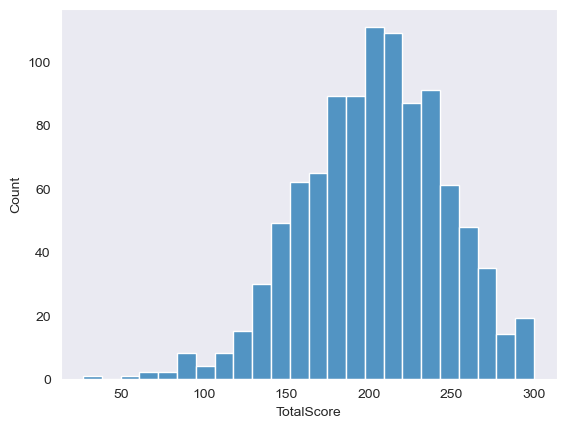

In [20]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
    plt.show()

### kdeplot

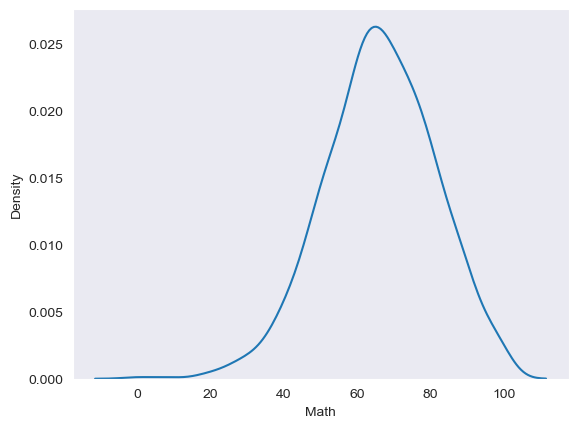

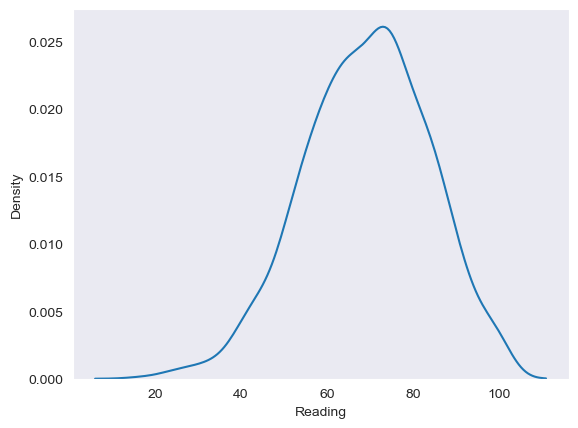

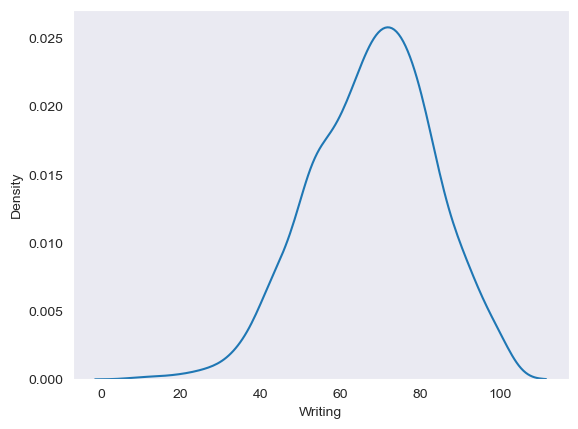

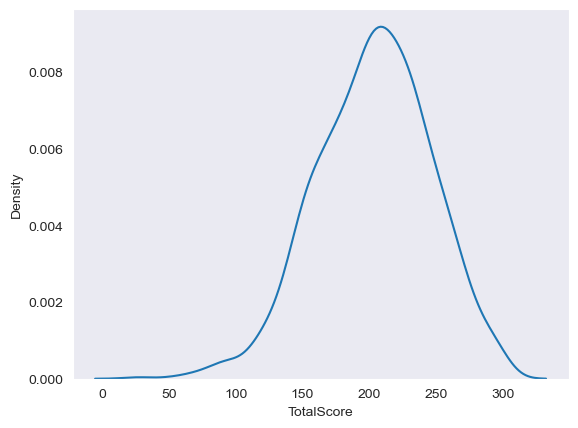

In [21]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(x=df[i])
        plt.show()

### Checking outliers with the help of Boxplot

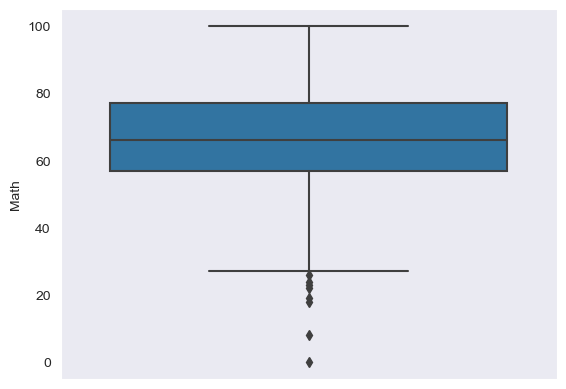

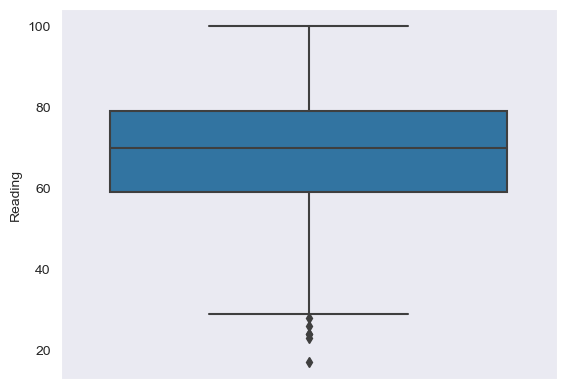

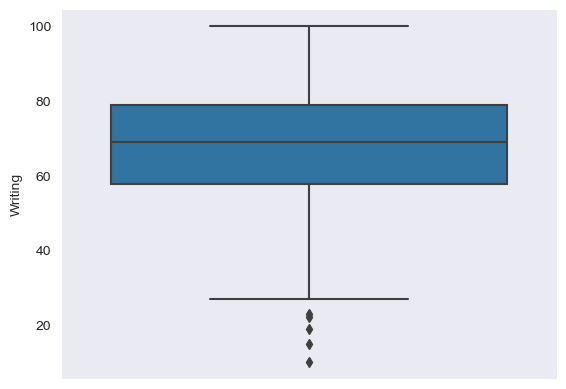

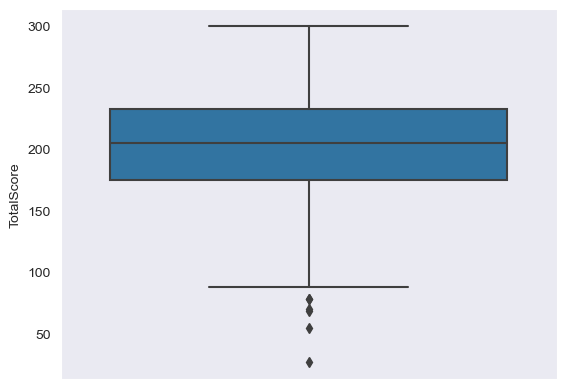

In [22]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

### Removing the outliers

In [23]:
def outlier_limit(col):
    Q1 , Q3 = np.nanpercentile(col, [25, 75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL, UL

In [24]:
for col in df.columns:
    if df[col].dtype != "object":
        LL, UL = outlier_limit(df[col])
        df[col] = np.where((df[col] > UL) | (df[col] < LL), np.nan, df[col])

### Rechecking the outliers

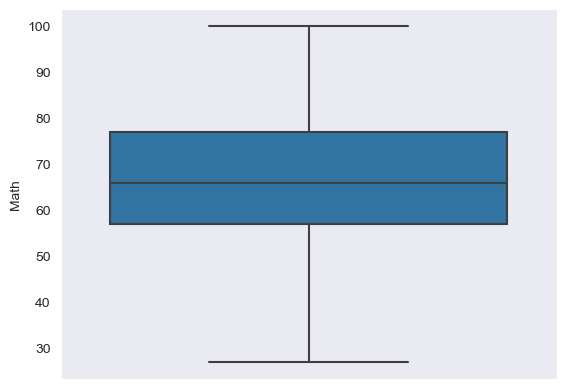

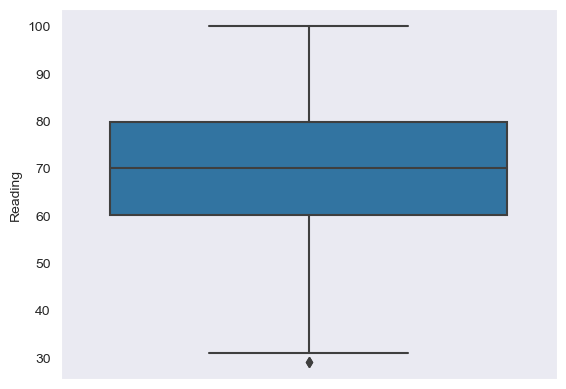

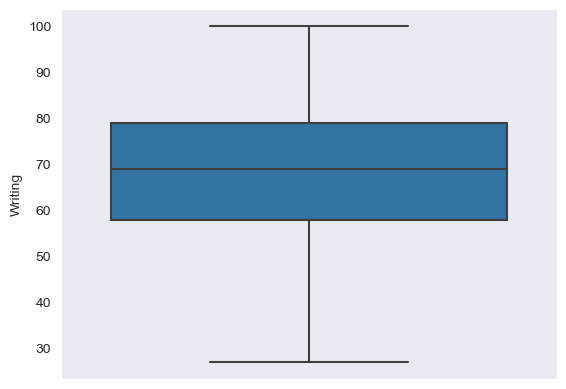

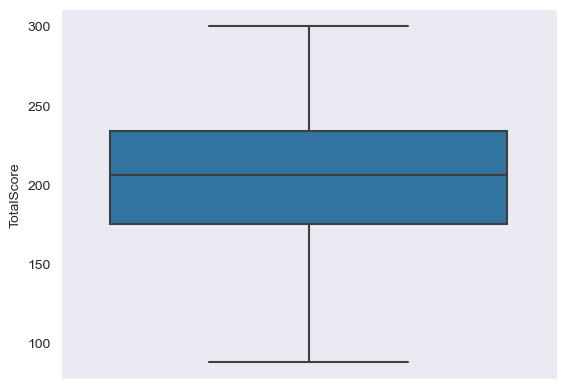

In [25]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

### Checking null values

In [26]:
df.isnull().sum()

Gender                0
Group                 0
Parental_Education    0
Lunch                 0
PreparationCourse     0
Math                  8
Reading               6
Writing               5
TotalScore            6
dtype: int64

### Dropping null values

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                0
Group                 0
Parental_Education    0
Lunch                 0
PreparationCourse     0
Math                  0
Reading               0
Writing               0
TotalScore            0
dtype: int64

### Label Encoding and  transforming all categorical columns in to numerical

In [28]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df['Gender'])
df["Group"]=le.fit_transform(df['Group'])
df["Parental_Education"]=le.fit_transform(df['Parental_Education'])
df["Lunch"]=le.fit_transform(df['Lunch'])
df["PreparationCourse"]=le.fit_transform(df['PreparationCourse'])

### Checking the corelation by plotting  Heatmap By Taking Total score

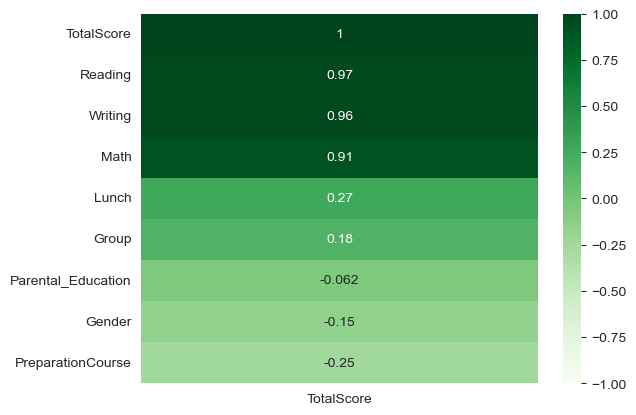

In [29]:
sns.heatmap(df.corr()[["TotalScore"]].sort_values(by="TotalScore", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

### Then i take Reading,Writing,Math scores as x and TotalScore as  y for prediction purpose

In [30]:
x=df[["Reading","Writing","Math"]].values
y=df[["TotalScore"]].values

### Then i take MinMaxScaler for scalling and then i done cross validation to find out the best model

In [31]:
sc=MinMaxScaler()

In [32]:
x=sc.fit_transform(x)

In [33]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    
}

In [34]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4.337776612595056e-14
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  5.3811784546337975
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.43393979716665243
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3.4682190592646966
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.8344848377702092
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  4.999145998442676
*******************************************

### After Checking the Average RMSE of each model I find out that Ridge  is the best model and then i fit that model for further purpose

In [35]:
rfr=Ridge()

### splitting data in to tranning and test set

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Model Fitting

In [37]:
rfr.fit(x_train, y_train)

Ridge()

In [38]:
print("model trained with {}".format(rfr))
training_score = rfr.score(x_train, y_train)*100
testing_score = rfr.score(x_test, y_test)*100
score = r2_score(y_test, rfr.predict(x_test))*100
mae = mean_absolute_error(y_test, rfr.predict(x_test))
mse = mean_squared_error(y_test, rfr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with Ridge()
r2score:  99.98467011950459
training_score:  99.98508742534769
testing_score:  99.98467011950459
mae:  0.43135115928998635
mse:  0.2680983261847979
rmse_test:  0.5177821223109175


### making predicted value and compare it with Actual value

In [39]:
y_pred = rfr.predict(x)

In [40]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,218.0,217.798879
1,247.0,246.584069
2,278.0,277.108265
3,148.0,148.747491
4,229.0,228.688816
...,...,...
983,282.0,281.101065
984,172.0,172.320638
985,195.0,195.171236
986,223.0,222.806400


### Visualising the out put with scatterplot

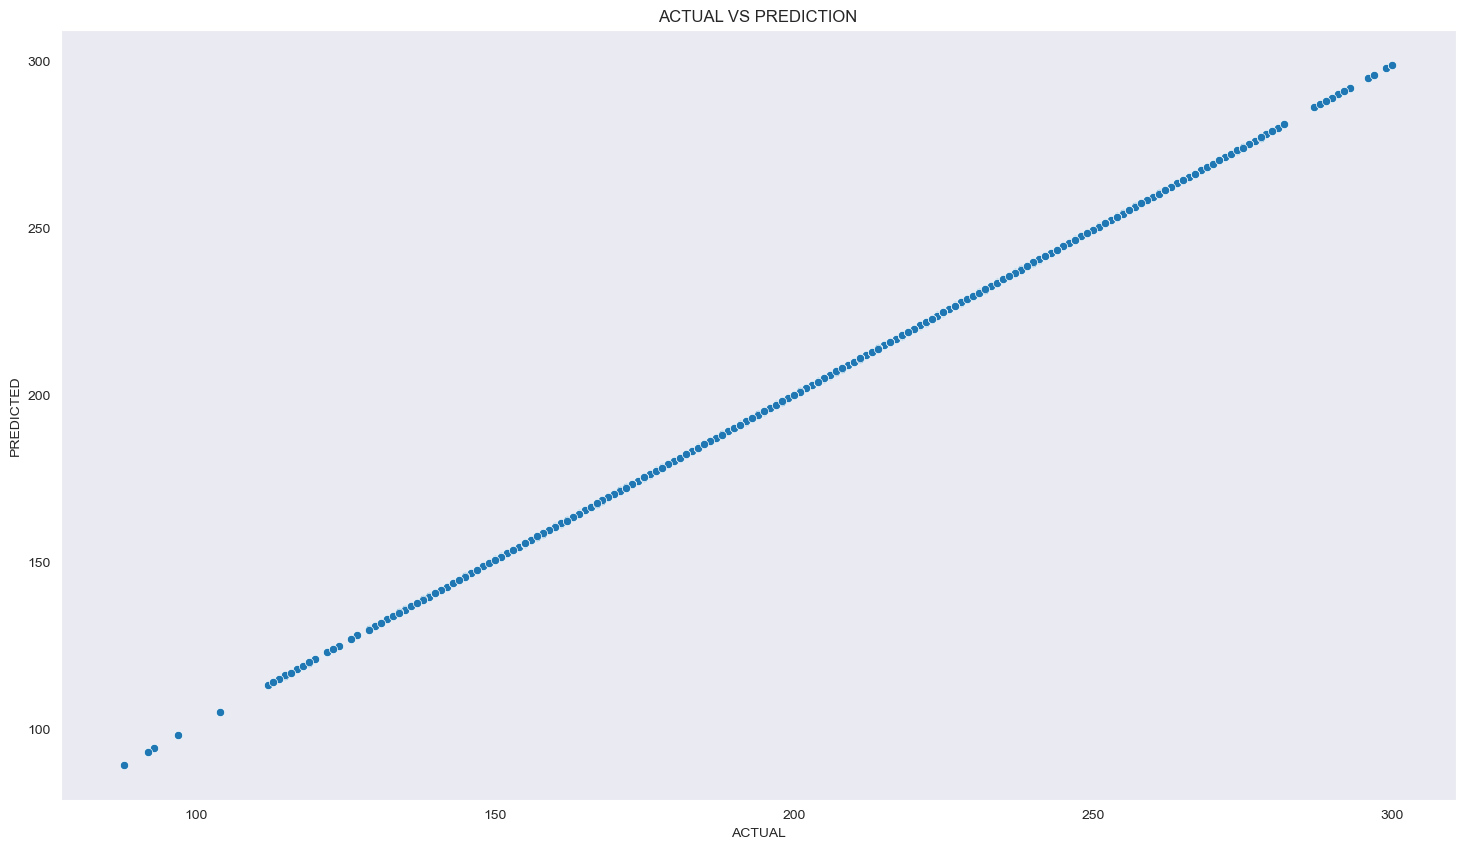

In [41]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

# Conclusion 

From the given data set i made it to the conclusion that  the Totalscore of every students is associated with other factors in the data set and there is high corelation is existing in the dataset
